In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from pandas import json_normalize
from scipy import stats
from scipy.signal import savgol_filter

In [62]:
df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")

# 시간 단위 컬럼으로 변환
df['utc_time'] = pd.to_datetime(df['utc_time'])

df.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_8396\477848715.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")


,fullVisitorId,visitStartTime,channelGrouping,continent,subContinent,country,city,visits,pageviews,hits,...,bounces,transactionRevenue,campaign,source,medium,keyword,browser,operatingSystem,deviceCategory,utc_time
0,1131660440785968503,1472830385,Organic Search,Asia,Western Asia,Turkey,Izmir,1,1,1,...,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-02 15:33:05+00:00
1,377306020877927890,1472880147,Organic Search,Oceania,Australasia,Australia,not available in demo dataset,1,1,1,...,1,0,(not set),google,organic,(not provided),Firefox,Macintosh,desktop,2016-09-03 05:22:27+00:00
2,3895546263509774583,1472865386,Organic Search,Europe,Southern Europe,Spain,Madrid,1,1,1,...,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-03 01:16:26+00:00


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fullVisitorId       903653 non-null  object             
 1   visitStartTime      903653 non-null  int64              
 2   channelGrouping     903653 non-null  object             
 3   continent           903653 non-null  object             
 4   subContinent        903653 non-null  object             
 5   country             903653 non-null  object             
 6   city                903653 non-null  object             
 7   visits              903653 non-null  int64              
 8   pageviews           903653 non-null  int64              
 9   hits                903653 non-null  int64              
 10  newVisits           903653 non-null  int64              
 11  bounces             903653 non-null  int64              
 12  transactionReven

In [64]:
# transaction revenue 컬럼이 0이면 0, 0을 초과하면 1로 표시되는 새로운 컬럼 추가(revenue_occurred)
df['revenue_occurred'] = np.where(df['transactionRevenue'] == 0, 0, 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fullVisitorId       903653 non-null  object             
 1   visitStartTime      903653 non-null  int64              
 2   channelGrouping     903653 non-null  object             
 3   continent           903653 non-null  object             
 4   subContinent        903653 non-null  object             
 5   country             903653 non-null  object             
 6   city                903653 non-null  object             
 7   visits              903653 non-null  int64              
 8   pageviews           903653 non-null  int64              
 9   hits                903653 non-null  int64              
 10  newVisits           903653 non-null  int64              
 11  bounces             903653 non-null  int64              
 12  transactionReven

- revenue 가 발생한 접속 세션 데이터와 발생하지 않은 접속 세션 데이터를 분류, 각각 테이블 생성

In [66]:
# revenue_occurred가 0인 데이터만 추출
df_revenue_0 = df[df['revenue_occurred'] == 0]

# revenue_occurred가 1인 데이터만 추출
df_revenue_1 = df[df['revenue_occurred'] == 1]

- 접속한 클라이언트가 구매활동을 할 확률 : 1/90

In [67]:
# 각각의 테이블 데이터 갯수 확인
print(len(df))

print(len(df_revenue_0))

print(len(df_revenue_1))

903653
892138
11515


- df_revenue_0 데이터 테이블의 DAU 그래프 생성

C:\Users\user\AppData\Local\Temp\ipykernel_8396\2895395780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from current 

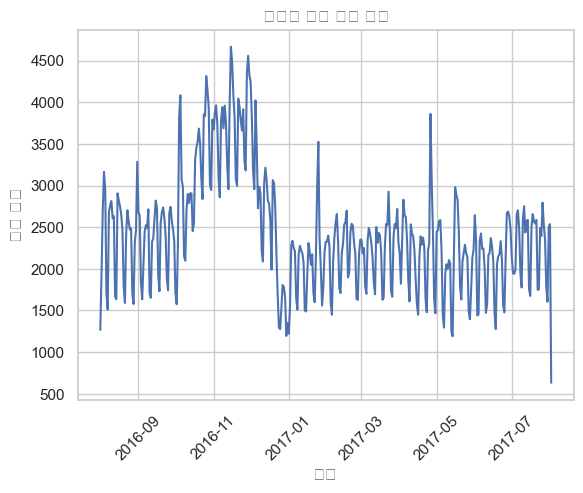

In [68]:
# date_revenue_0 의 DAU 그래프
import pandas as pd
import matplotlib.pyplot as plt

# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_0 = df_revenue_0['date'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(date_counts_revenue_0.index, date_counts_revenue_0.values)
plt.title('날짜별 접속 빈도 분포')
plt.xlabel('날짜')
plt.ylabel('접속 빈도')
plt.xticks(rotation=45)
plt.show()

- Savitzky-Golay 필터를 이용해 그래프의 중간 부분을 이어서 부드러운 선 그래프 생성

C:\Users\user\AppData\Local\Temp\ipykernel_8396\643071722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['utc_time'] = pd.to_datetime(df_revenue_0['utc_time'])
C:\Users\user\AppData\Local\Temp\ipykernel_8396\643071722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date


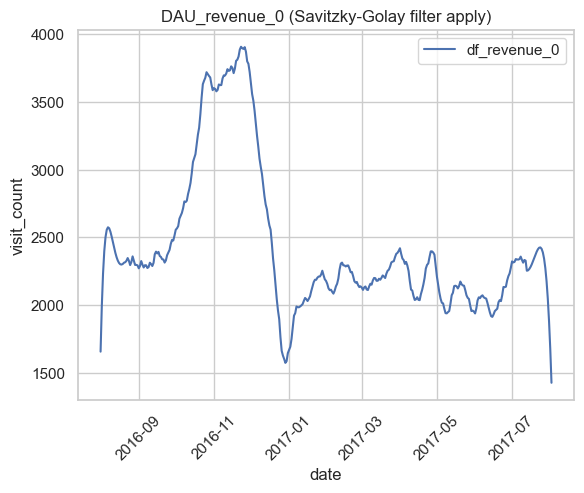

In [69]:
# 'utc_time' 컬럼을 datetime 형식으로 변환
df_revenue_0['utc_time'] = pd.to_datetime(df_revenue_0['utc_time'])

# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_0 = df_revenue_0['date'].value_counts().sort_index()

# Savitzky-Golay 필터 적용
smoothed_counts_revenue_0 = savgol_filter(date_counts_revenue_0.values, window_length=40, polyorder=5)

# 선 그래프 그리기
plt.plot(date_counts_revenue_0.index, smoothed_counts_revenue_0, label='df_revenue_0')
plt.title('DAU_revenue_0 (Savitzky-Golay filter apply)')
plt.xlabel('date')
plt.ylabel('visit_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- 같은 방식으로 df_revenue_1 의 DAU 선그래프 생성

C:\Users\user\AppData\Local\Temp\ipykernel_8396\3115064606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_1['date'] = df_revenue_1['utc_time'].dt.date


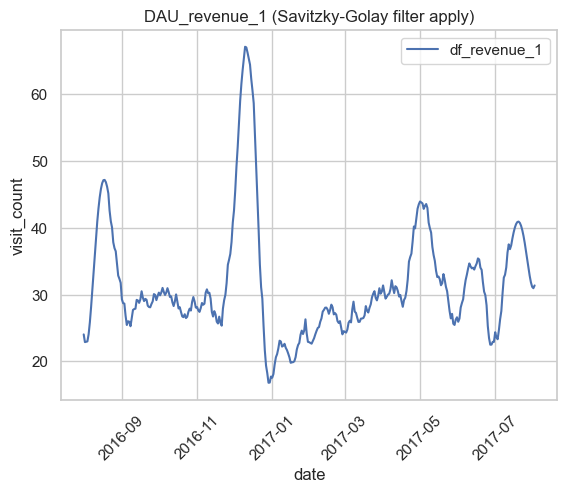

In [70]:
# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_1['date'] = df_revenue_1['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_1 = df_revenue_1['date'].value_counts().sort_index()

# Savitzky-Golay 필터 적용
smoothed_counts_revenue_1 = savgol_filter(date_counts_revenue_1.values, window_length=40, polyorder=5)

# 선 그래프 그리기
plt.plot(date_counts_revenue_1.index, smoothed_counts_revenue_1, label='df_revenue_1')
plt.title('DAU_revenue_1 (Savitzky-Golay filter apply)')
plt.xlabel('date')
plt.ylabel('visit_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 가이드라인
- DAU/WAU/MAU를 line chart로 시각화
- 유저별 평균접속시간의 분포를 ECDF로 시각화
- 방문 주차에 따른 코호트를 생성하고, 코호트 별로 weekly 리텐션을 구하고 이를 heatmap으로 시각화
- 요일/시간대별 사용자 수를 구하고 이를 heatmap으로 시각화

## DAU, WAU, MAU 시각화

1. 원본 df 의 DAU 시각화

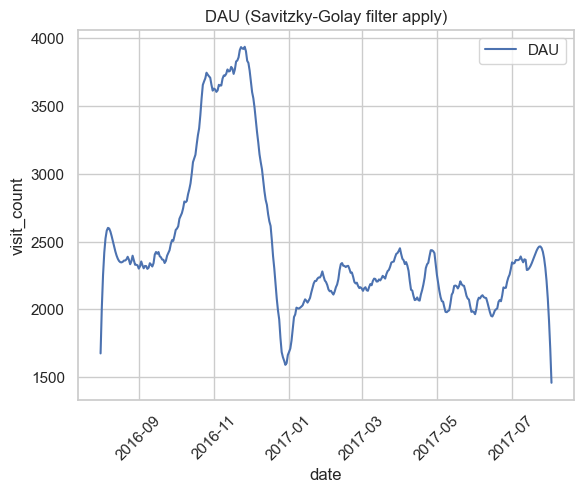

In [71]:
# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df['date'] = df['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts = df['date'].value_counts().sort_index()

# Savitzky-Golay 필터 적용
smoothed_counts = savgol_filter(date_counts.values, window_length=40, polyorder=5)

# 선 그래프 그리기
plt.plot(date_counts.index, smoothed_counts, label='DAU')
plt.title('DAU (Savitzky-Golay filter apply)')
plt.xlabel('date')
plt.ylabel('visit_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

- 원본 df WAU 시각화

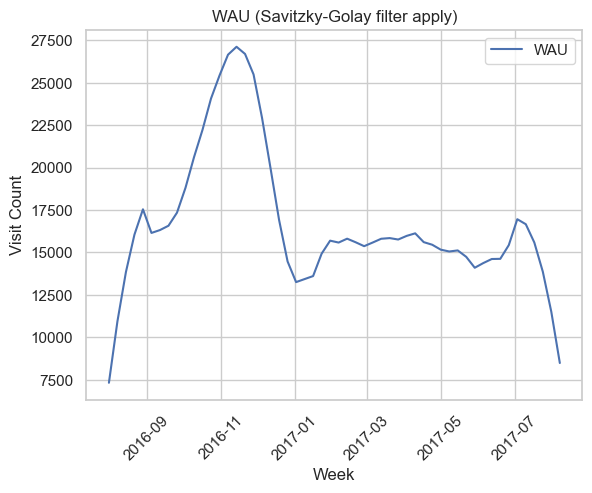

In [72]:
# 'utc_time' 컬럼을 datetime 형식으로 변환
df['utc_time'] = pd.to_datetime(df['utc_time'])

# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df['date'] = df['utc_time'].dt.date

# 주 단위로 데이터 집계
weekly_counts = df.resample('W-Mon', on='utc_time').size()

# Savitzky-Golay 필터 적용
smoothed_weekly_counts = savgol_filter(weekly_counts.values, window_length=10, polyorder=2)

# 선 그래프 그리기
plt.plot(weekly_counts.index, smoothed_weekly_counts, label='WAU')
plt.title('WAU (Savitzky-Golay filter apply)')
plt.xlabel('Week')
plt.ylabel('Visit Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- df WAU 시각화 (평탄화 미적용)

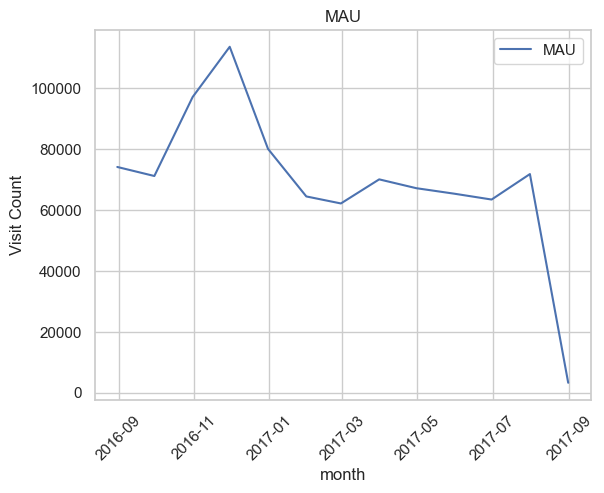

In [73]:
# 월 단위로 데이터 집계
monthly_counts = df.resample('M', on='utc_time').size()

# 선 그래프 그리기
plt.plot(monthly_counts.index, monthly_counts.values, label='MAU')
plt.title('MAU')
plt.xlabel('month')
plt.ylabel('Visit Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 유저별 평균 접속 시간의 분포를 <br>ECDF(경험적 누적분포 함수)를 이용하여 시각화

- 각 유저별로 그룹화한 뒤, 유저별 평균 접속 시간을 구하는 데이터 테이블 생성

In [74]:
# 'utc_time' 컬럼을 datetime 형태로 변환
df['utc_time'] = pd.to_datetime(df['utc_time'])

# 각 유저의 첫 번째 접속 시간과 마지막 접속 시간을 구함
user_first_login = df.groupby(['fullVisitorId', df['utc_time'].dt.date])['utc_time'].min()
user_last_login = df.groupby(['fullVisitorId', df['utc_time'].dt.date])['utc_time'].max()

# 각 유저의 접속 지속 시간을 계산
user_duration = (user_last_login - user_first_login).dt.total_seconds()

# 각 유저의 접속 지속 시간을 모두 더한 뒤, 해당 유저가 총 접속한 일수로 나누어 평균을 구함
average_duration = user_duration.groupby('fullVisitorId').sum() / user_duration.groupby('fullVisitorId').count()

# NaN 값을 0으로 채워주어 유저가 하루에 한 번만 접속한 경우에 대한 처리
average_duration = average_duration.fillna(0)

# 결과를 새로운 데이터프레임으로 저장
result_df = pd.DataFrame({'fullVisitorId': average_duration.index, 'average_duration': average_duration.values})

# 결과
result_df

,fullVisitorId,average_duration
0,4823595352351,0.0
1,5103959234087,0.0
2,10278554503158,0.0
3,20424342248747,0.0
4,26722803385797,0.0
...,...,...
731416,9999739624339618281,0.0
731417,9999761280717362235,0.0
731418,9999773079368714197,0.0
731419,9999799804624735268,0.0


- ECDF(경험적 누적 분포 함수)를 이용해 시각화

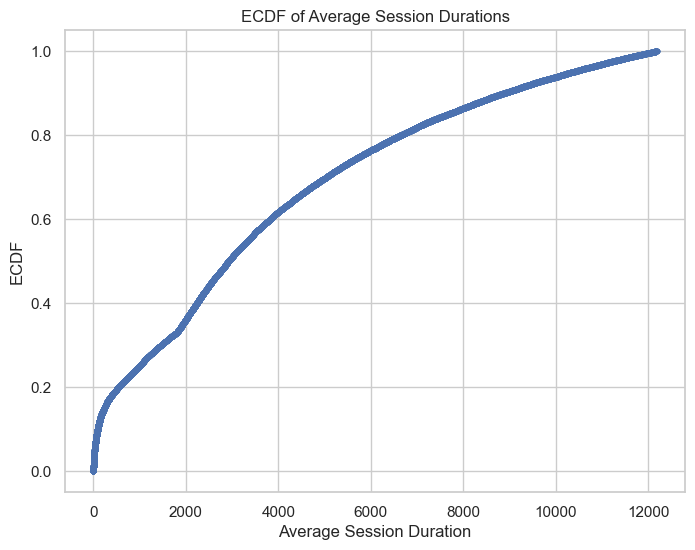

In [85]:
# ECDF 계산 함수 정의
def ecdf(data):
    sorted_data = np.sort(data)
    n = len(data)
    x = sorted_data
    y = np.arange(1, n + 1) / n
    return x, y

# 평균 접속 지속 시간의 ECDF 계산
x_duration, y_duration = ecdf(result_df['average_duration'])

# ECDF 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x_duration, y_duration, marker='.', linestyle='none', color='b')
plt.title('ECDF of Average Session Durations')
plt.xlabel('Average Session Duration')
plt.ylabel('ECDF')
plt.show()

- result_df 테이블에 이상치 제거하고 정규 분포로 보기

In [76]:
# Z-score를 계산하여 이상치 제거
z_scores = (result_df['average_duration'] - result_df['average_duration'].mean()) / result_df['average_duration'].std()
result_df = result_df[np.abs(z_scores) < 3]  # 3 시그마 범위 내의 데이터만 포함

- 0인 데이터가 너무 많아서 제대로 분포가 나오지 않음 - average_duration 이 0인 데이터 제거

In [77]:
result_df = result_df[(result_df['average_duration'] != 0.0)]

In [78]:
result_df.describe()

,average_duration
count,35873.000000
mean,3741.799166
std,3240.066996
min,0.200000
25%,994.000000
50%,2923.000000
75%,5775.000000
max,12186.000000


In [79]:
print(len(result_df))

35873


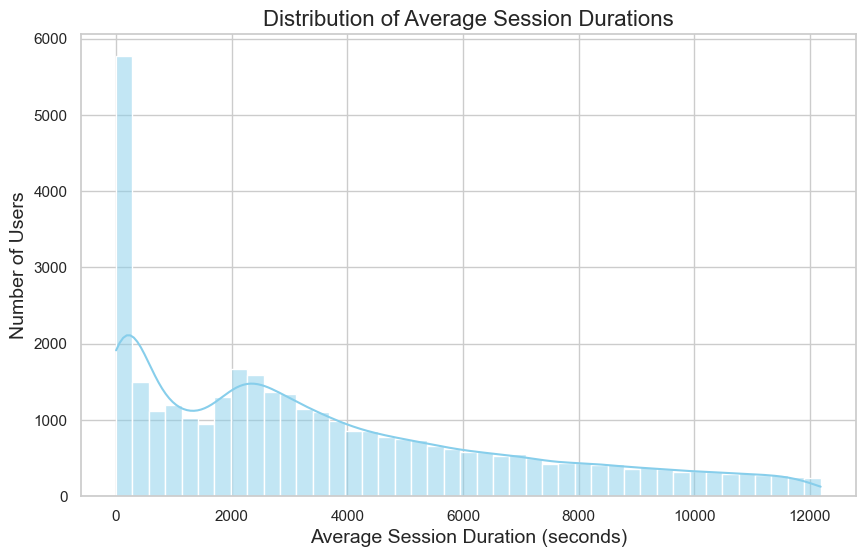

In [80]:
# 정규분포 그래프를 그리기 위해 시각화 라이브러리 설정
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 평균 접속 지속 시간의 정규분포 그래프 그리기
sns.histplot(result_df['average_duration'], kde=True, color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.title('Distribution of Average Session Durations', fontsize=16)
plt.xlabel('Average Session Duration (seconds)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# 그래프 출력
plt.show()

- 지역별로 평균 접속 시간 분석

- 유저들을 분류하는 기준 컬럼 : subContinent

In [81]:
# country 컬럼의 unique 값 조회
df['subContinent'].unique()

array(['Western Asia', 'Australasia', 'Southern Europe', 'Southeast Asia',
       'Northern Europe', 'Southern Asia', 'Western Europe',
       'South America', 'Eastern Asia', 'Eastern Europe',
       'Northern America', 'Western Africa', 'Central America',
       'Eastern Africa', '(not set)', 'Caribbean', 'Southern Africa',
       'Northern Africa', 'Central Asia', 'Middle Africa', 'Melanesia',
       'Micronesian Region', 'Polynesia'], dtype=object)

- df 에서 지역 정보가 없거나 대륙 뷴류를 벗어나는 데이터를 제외시키고 새로운 데이터 테이블 생성

In [82]:
have_subcontinent_df = df[(df['subContinent'] != '(not set)') & 
                        (df['subContinent'] != 'Melanesia') & 
                        (df['subContinent'] != 'Micronesian Region') & 
                        (df['subContinent'] != 'Polynesia')]


print(len(have_subcontinent_df))
print(len(df)) ## 약 1600개 정도의 데이터가 빠진것을 확인 (903653 개에서 902024개로 줄음)

902024
903653


In [83]:
# 확인
have_subcontinent_df['subContinent'].unique()

array(['Western Asia', 'Australasia', 'Southern Europe', 'Southeast Asia',
       'Northern Europe', 'Southern Asia', 'Western Europe',
       'South America', 'Eastern Asia', 'Eastern Europe',
       'Northern America', 'Western Africa', 'Central America',
       'Eastern Africa', 'Caribbean', 'Southern Africa',
       'Northern Africa', 'Central Asia', 'Middle Africa'], dtype=object)

- 